In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

# Model

$ \frac{dI}{dt}=\frac{2prI(N-I)}{N^2}$

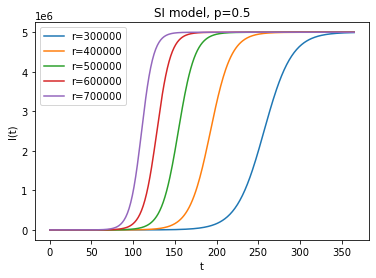

In [25]:
import matplotlib.pyplot as plt
population = 5e6
N=population

for r in range(300000, 800000, 100000):
    I=1
    Iarr=[I]
    Tarr=[0]

    #r=#interactions/day
    p=0.5
    tf=1
    dt=1/(24*60)

    for i in range(0, 365):
        t=0
        while t<tf:
            I=I+2*r*p/(N**2)*I*(N-I)*dt
            t+=dt
        Iarr.append(I)
        Tarr.append(t)
    plt.plot(Iarr, label = "r="+str(r))
plt.xlabel('t')
plt.ylabel('I(t)')
plt.title('SI model, p=0.5')
plt.legend()
plt.show()

In [26]:
def derivative(Y, dt):
    der=[]
    for i in range(1,len(Y)-1):
        der.append((Y[i+1]-Y[i-1])/(2*dt))
    return der
class Stack:
    def __init__(self, size, value = 0, interpolation = False):
        self.stackArr = [value]*size
        if interpolation:
            y0 = interpolation[0]
            yf = interpolation[1]
            x0 = 0
            xf = size
            self.stackArr = np.interp(list(range(size)), [x0,xf],[y0,yf])
            self.stackArr = list(self.stackArr)
    def add(self, value):
        self.stackArr.pop(0)
        self.stackArr.append(value)
    def get(self):
        return self.stackArr[0]  
    
class Stack2:
    def __init__(self, values):
        self.stackArr = values
    def add(self, value):
        self.stackArr.pop(0)
        self.stackArr.append(value)
    def get(self):
        return self.stackArr[0]  

# Model
$\frac{dS}{dt}=-rIS$, S is susceptible
<br>
$\frac{dI}{dt}=rIS-\alpha I - \beta I$, I is infective
<br>
$\frac{dR}{dt}=\alpha I$, R is recovered
<br>
$\frac{dD}{dt}=\beta I$, D is dead

In [27]:
from matplotlib import pyplot as plt
import numpy as np

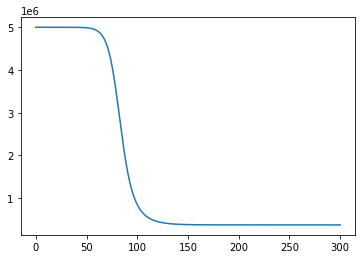

In [28]:
r=1400000
r0=r
population = 5e6
N=population


alpha=0.1
I=1
S=population-I
Q=0
R=0
Iarr=[I]
Sarr=[S]
Qarr=[Q]
Rarr=[R]
rarr=[r]
    #r=1000*24*60#interactions/day
p=0.5
tf=1
dt=1/(24*60)


for i in range(0,300):
    t=0
    while t<tf:
        S=S+(-2*r*p*I*S/N**2)*dt
        I=I+(2*r*p*I*S/N**2-alpha*I)*dt
        R=R+(alpha*I)*dt
        t+=dt
    Iarr.append(I)
    Sarr.append(S)
plt.plot(Sarr)


# Model: SIR delayed recovery

$\frac{dS(t)}{dt}= -\frac{2pISr}{N^2}$
<br>
$\frac{dI(t)}{dt} = \frac{2pISr}{N^2} + \frac{dS(t-\tau)}{dt}$
<br>
$\frac{dR(t)}{dt} =  -\frac{dS(t-\tau)}{dt}$

In [29]:
def get_initial_functions(delay, p, r, N, S, I, dt):
    simLength = delay
    tf=-1

    Sarrstack = [S]
    Iarrstack = [I]

    time = [0]

    c = 2*p*r/N**2
    for i in range(0, simLength):
        t=0
        while t>tf:
            S = S - (-c*I*S)*dt
            I = I - (c*I*S)*dt
            t-=dt
            Sarrstack.append(S)
            Iarrstack.append(I)
            time.append(t - i)

    Iarrstack.pop(0)
    Sarrstack.pop(0)
    Iarrstack.reverse()
    Sarrstack.reverse()

    return Sarrstack, Iarrstack


Text(0.5, 1.0, 'DelaySIR, p=1, r=1000000.0, tau=13')

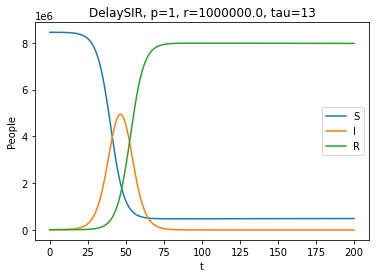

In [30]:
import numpy as np
import matplotlib.pyplot as plt

N=8.46e6
r=0.75e6

p=1
r=1e6
c=p*r
k=2*c/(N**2)
I=1000#N/2-np.sqrt(N**2 - 4*i_smoothed[0]/k)/2
I0=I
S=N-I
S0 = S

R=0
Iarr=[I]
Sarr=[S]
Rarr=[R]
simLength = 200

    #r=1000*24*60#interactions/day

tf=1
dt=1/(100)
#delay = 20#delay between desease and recovery in days
delay=13
#lagged_S = Stack(int(delay/dt))#, interpolation=(N,S))
#lagged_I = Stack(int(delay/dt))#, interpolation=(0,I))

Sarrstack, Iarrstack = get_initial_functions(delay, p, r, N, S, I, dt)
I00 = Iarrstack[0]

lagged_S = Stack2(Sarrstack)
lagged_I = Stack2(Iarrstack)

for i in range(0, simLength):
    t=0
    if i == delay:
        #I-= I0
        #S0 -= S
        pass
    while t<tf:
        S=S+(-2*r*p*I*S/(N**2))*dt
        I=I+(2*r*p*(I*S-lagged_S.get()*lagged_I.get())/(N**2))*dt
        R=R+(2*r*p*(lagged_S.get()*lagged_I.get())/(N**2))*dt
        lagged_S.add(S)
        lagged_I.add(I)
        t+=dt
    Iarr.append(I)
    Sarr.append(S)
    Rarr.append(R)
Sss.append(Sarr[-1])
delays.append(delay)
#plt.plot(Sarr, label = "r="+str(r))
#Imax[jj][ii]=np.argmax(Iarr)
    #delayArr.append(delay)
#plt.figure(fig)
plt.plot(Sarr, label = "S")
plt.plot(Iarr, label = "I")
plt.plot(Rarr, label = "R")
plt.plot([0])
plt.xlabel('t')
plt.ylabel('People')
plt.legend()
plt.title(f'DelaySIR, p={p}, r={r}, tau={delay}')

### Test for symmetry

In [31]:
A = np.array(Iarr)
istar = np.argmax(A)
residual = 0
i = 1
dt = 1
while istar-i > 0:
    residual += (A[istar + i]-A[istar - i])*dt
    i += 1
totalIntegral = sum(A[0:istar*2+1])
print(f'residual: {residual}, totalIntegral: {totalIntegral}, ratio = {residual/totalIntegral}')

residual: 3986892.996471336, totalIntegral: 103475400.72108245, ratio = 0.03852986283395018


## Fit the model parameters

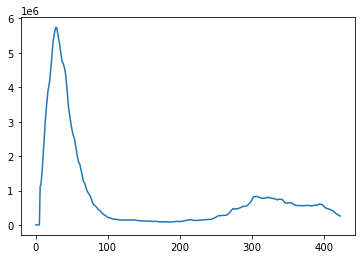

In [32]:
import pandas as pd


df = pd.read_csv('data/nycdata.csv')
N=8.42e6
df['total'] = df['PERCENT_POSITIVE_7DAYS_AVG']*N
plt.plot(df['total'])
i_smoothed = df['total'].values[6:206]*0.05

In [33]:
def delaySIR(c, tau, plotting = False):
    tau = int(tau)
    N=8.42e6
    c=c
    k=2*c/(N**2)
    I=N/2-np.sqrt(N**2 - 4*i_smoothed[0]/k)/2
    I0=I
    S=N-I
    S0 = S

    R=0
    Iarr=[I]
    Sarr=[S]
    Rarr=[R]
    simLength = 201

        #r=1000*24*60#interactions/day
    p=1
    tf=1
    dt=1/(100)
    #delay = 20#delay between desease and recovery in days
    delay=tau
    #lagged_S = Stack(int(delay/dt))#, interpolation=(N,S))
    #lagged_I = Stack(int(delay/dt))#, interpolation=(0,I))
    r = c/p
    Sarrstack, Iarrstack = get_initial_functions(delay, p, r, N, S, I, dt)

    lagged_S = Stack2(Sarrstack)
    lagged_I = Stack2(Iarrstack)

    for i in range(0, simLength):
        t=0
        if i == delay:
            #I-= I0
            #S0 -= S
            pass
        while t<tf:
            S=S+(-2*c*I*S/(N**2))*dt
            I=I+(2*c*(I*S-lagged_S.get()*lagged_I.get())/(N**2))*dt
            R=R+(2*c*(lagged_S.get()*lagged_I.get())/(N**2))*dt
            lagged_S.add(S)
            lagged_I.add(I)
            t+=dt
        Iarr.append(I)
        Sarr.append(S)
        Rarr.append(R)
    T_si = -np.array(derivative(Sarr, 1))
    if plotting:
        return T_si
    loss = sum((T_si-i_smoothed)**2)/200
    return -loss

In [34]:
losses, params =[],[]
for tau in range(1,14):
    for c in np.linspace(500000, 900000, 10):
        loss = delaySIR(c, tau)
        losses.append(loss)
        params.append({'c':c, 'tau':tau})

Text(0, 0.5, 'New daily cases')

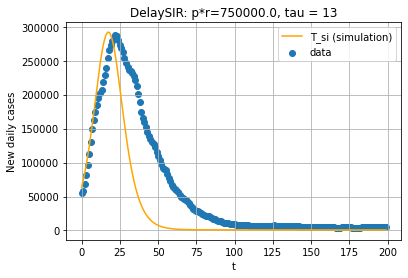

In [35]:
sim = delaySIR(0.75e6, 13, plotting = True)
plt.scatter(range(0,200),i_smoothed, label = 'data')
#plt.plot(sim)
x=0
plt.plot(sim, label = 'T_si (simulation)', color = 'orange')
plt.legend()
plt.grid()
plt.title(f'DelaySIR: p*r={0.75e6}, tau = {13}')
plt.xlabel('t')
plt.ylabel('New daily cases')